In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweet.csv')

print(train.shape)
print(test.shape)

(11434, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,1,Argh.. I hate my life
1,2,0,I'm good
2,3,0,Enjoy my life
3,4,0,RT : I do what I want
4,5,1,My life is just a series of unfortunate fucked...


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
train[train['label'] == 0].head(10)

,id,label,tweet
1,2,0,I'm good
2,3,0,Enjoy my life
3,4,0,RT : I do what I want
5,6,0,Im tryna become better everyday I open my eyes...
9,10,0,oh I have lol I just eventually get what I wan...
19,20,0,I do what i want to
23,24,0,Soo happy! With my life with you with everythi...
24,25,0,RT : i do what i want
25,26,0,I love how I can only trust 2 people in my lif...
26,27,0,"RT @Libras_R_Us: As a #Libra, I get revenge by..."


In [7]:
train[train['label'] == 1].head(10)

,id,label,tweet
0,1,1,Argh.. I hate my life
4,5,1,My life is just a series of unfortunate fucked...
6,7,1,RT : I hate how much I over-think at night
7,8,1,RT @sydthekid_15: I just want to be genuinely ...
8,9,1,My life is one big mess
10,11,1,RT : I hate how much I over-think at night
11,12,1,I swear this fucking shit for me
12,13,1,yup i hate my life
13,14,1,RT @_misterCT Being single Sucks... I ain't bo...
14,15,1,I have the worst headache ever imaginable


In [8]:
train['label'].value_counts()

0    6199
1    5235
Name: label, dtype: int64

<AxesSubplot: >

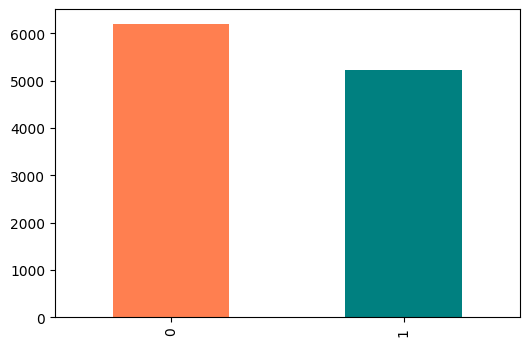

In [9]:
train['label'].value_counts().plot.bar(color = ['coral', 'teal'], figsize = (6, 4))

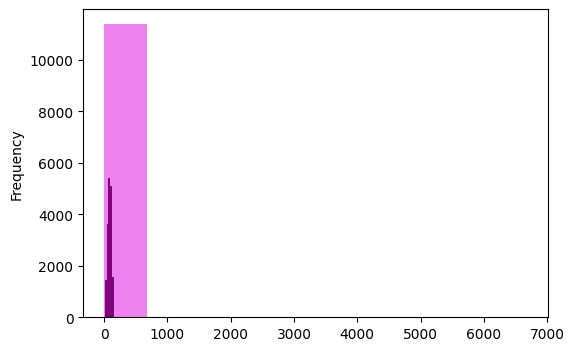

In [10]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'violet', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'purple', figsize = (6, 4))

In [11]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,1,Argh.. I hate my life,21
1,2,0,I'm good,8
2,3,0,Enjoy my life,13
3,4,0,RT : I do what I want,21
4,5,1,My life is just a series of unfortunate fucked...,80
5,6,0,Im tryna become better everyday I open my eyes...,96
6,7,1,RT : I hate how much I over-think at night,42
7,8,1,RT @sydthekid_15: I just want to be genuinely ...,51
8,9,1,My life is one big mess,23
9,10,0,oh I have lol I just eventually get what I wan...,54


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

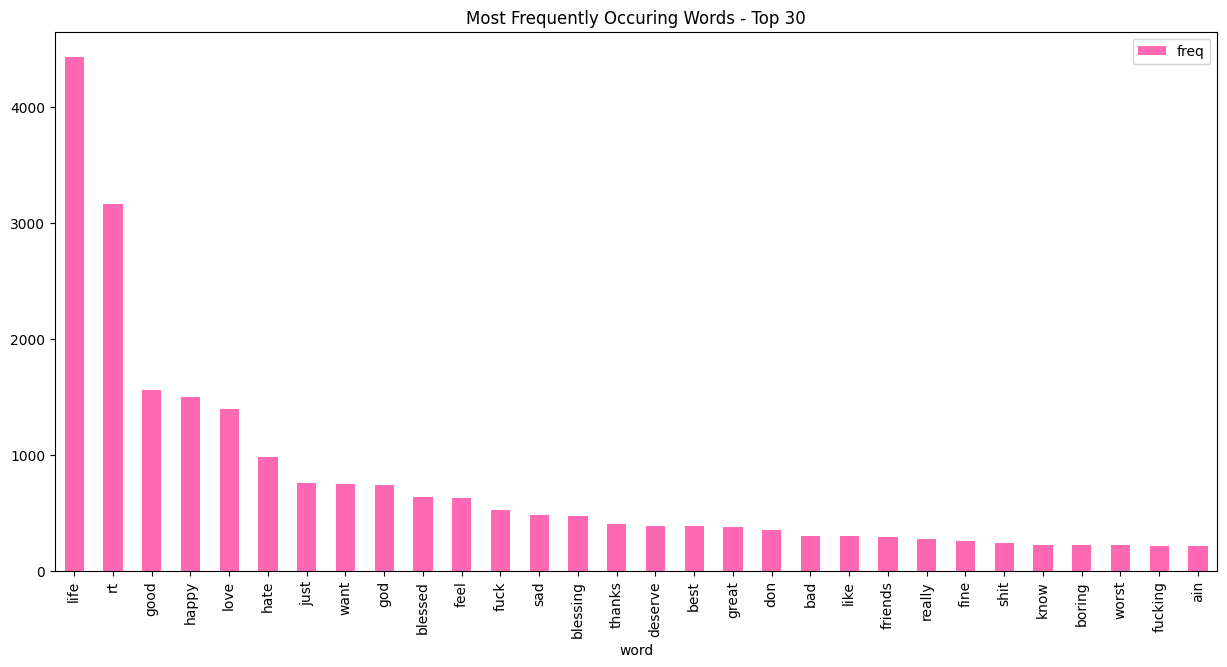

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'hotpink')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

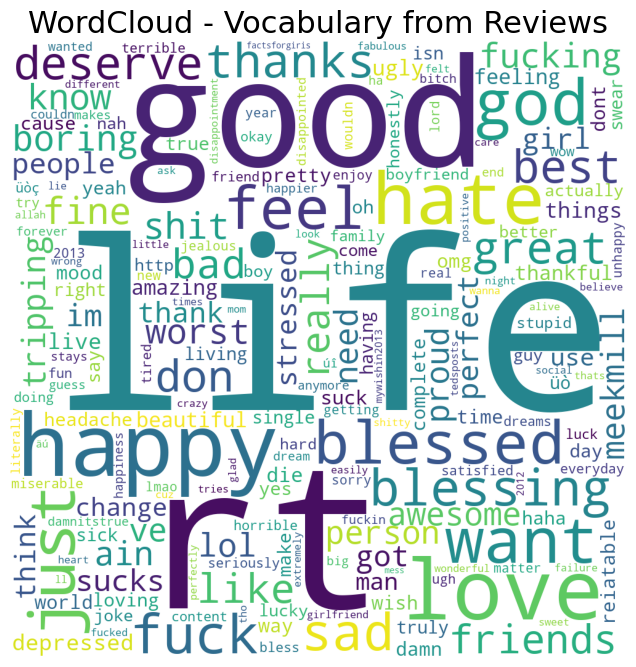

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

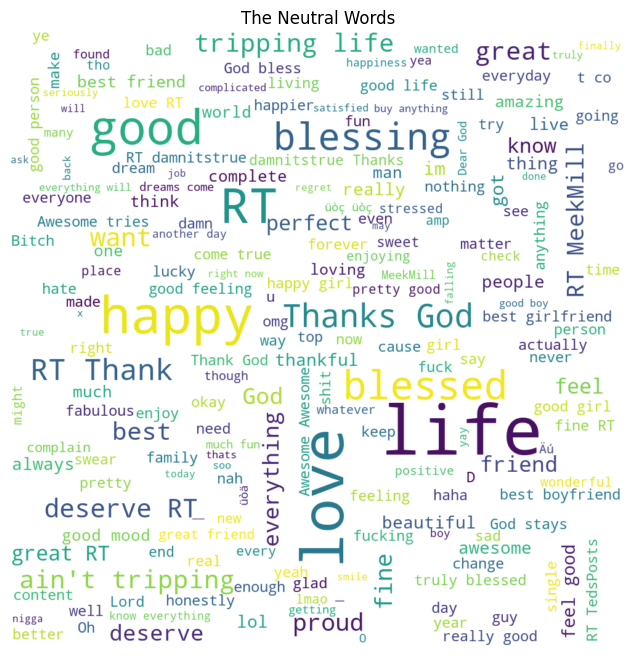

In [14]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=1000, height=1000, random_state = 0, max_font_size = 110, background_color = 'white').generate(normal_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

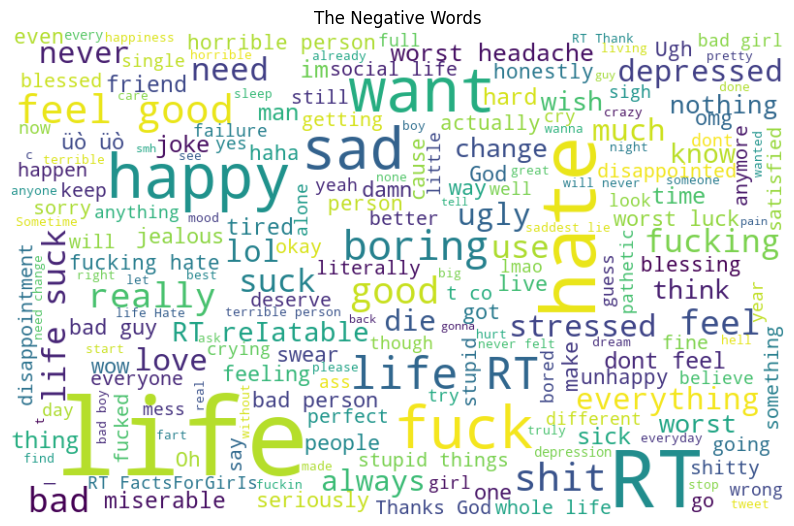

In [15]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

# Preprocessing

In [16]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train_new = []

for i in range(0, 11434):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
    review = ' '.join(review)
    train_new.append(review)
print(train_new)

['argh hate life', 'good', 'enjoy life', 'rt want', 'life seri unfortun fuck event margaretkuta mwrighht', 'im tryna becom better everyday open eye start realli understand life amaz', 'rt hate much think night', 'rt sydthekid want genuin happi', 'life one big mess', 'oh lol eventu get want though', 'rt hate much think night', 'swear fuck shit', 'yup hate life', 'rt misterct singl suck bout life', 'worst headach ever imagin', 'life', 'suck life', 'broken finger rest life suck', 'wish say happi', 'want', 'want chang lil nigga', 'wish differ', 'rt life perfectli terribl', 'soo happi life everyth couldntaskformor', 'rt want', 'love trust peopl life need', 'rt libra r us libra get reveng live great life', 'rt stress see bless', 'never disappoint life', 'good person serioustweet', 'want', 'rt attract weird peopl hate life', 'rt need posit peopl life', 'love way feel around', 'hate life hahahah', 'stori pathet life http co cq jqmyf', 'happi happier', 'life alway beauti know fine', 'lmao yeah 

In [18]:
test_new = []

for i in range(0, 17197):
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
    review = ' '.join(review)
    test_new.append(review)
print(test_new)

['studiolif aislif requir passion dedic willpow find newmateri', 'user white supremacist want everyon see new bird movi', 'safe way heal acn altwaystoh healthi heal', 'hp curs child book reserv alreadi ye harrypott pottermor favorit', 'rd bihday amaz hilari nephew eli ahmir uncl dave love miss', 'choos momtip', 'someth insid die eye ness smokeyey tire lone sof grung', 'finish tattoo ink ink loveit thank aleee', 'user user user never understand dad left young deep inthefeel', 'delici food lovelif capetown mannaepicur restur', 'dayswast narcosi infinit ep make awar grind neuro bass lifestyl', 'one world greatest spo event leman teamaudi', 'half way websit allgoingwel', 'good food good life enjoy call garlic bread iloveit', 'stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad', 'ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi', 'user got user limit edit rain shine set today user user user user', 'amp love amp hug amp kiss keep babi parent healthcar'

# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

y = train['label'].values

x_train, x_test, y_train, y_test = train_test_split(train_new, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=2500)

x_train_features = vectorizer.fit_transform(x_train).toarray()

x_test_features = vectorizer.transform(x_test).toarray()

print("Shape of x_train_features:", x_train_features.shape)
print("Shape of x_test_features:", x_test_features.shape)

Shape of x_train_features: (9147, 2500)
Shape of x_test_features: (2287, 2500)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', min_df=4,
                             ngram_range=(1, 1), max_features=3000)

xtrain_unigrams = vectorizer.fit_transform(x_train)

xtest_unigrams = vectorizer.transform(x_test)

In [21]:
print(len(vectorizer.get_feature_names_out()))
vectorizer.get_feature_names_out()

617


array(['abl', 'absolut', 'accept', 'ach', 'achiev', 'actual', 'adamtodd',
       'adventur', 'ah', 'aint', 'al', 'aliv', 'allah', 'allow', 'alon',
       'alot', 'alreadi', 'alright', 'alway', 'amaaaaz', 'amaz', 'amen',
       'amp', 'angri', 'annoy', 'anoth', 'anxieti', 'anymor', 'anyon',
       'anyth', 'apart', 'appar', 'appreci', 'argh', 'ask', 'ass', 'atm',
       'attract', 'aunt', 'aw', 'away', 'awesom', 'awh', 'awkward',
       'babe', 'babi', 'bad', 'badli', 'ball', 'basic', 'bc', 'beauti',
       'becom', 'bed', 'believ', 'best', 'bestest', 'bestfriend',
       'better', 'bieberlight', 'big', 'bit', 'bitch', 'black', 'blame',
       'blast', 'bless', 'bodi', 'bore', 'boredom', 'bout', 'boy',
       'boyfriend', 'break', 'breath', 'brilliant', 'bring', 'bro',
       'broken', 'brother', 'bull', 'bullshit', 'bunni', 'busi', 'button',
       'buy', 'bye', 'came', 'camper', 'campu', 'care', 'caus', 'chanc',
       'chang', 'check', 'child', 'choic', 'choos', 'clearli', 'colleg',


# Classification

In [22]:
from sklearn import svm
from sklearn import ensemble
from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [23]:
print("Shape of xtrain_unigrams:", xtrain_unigrams.shape)
print("Shape of y_train:", y_train.shape)

Shape of xtrain_unigrams: (9147, 617)
Shape of y_train: (9147,)


In [49]:
svm1=svm.SVC(kernel='rbf',gamma=0.1,shrinking=True, degree=3,random_state=None)
svm1.fit(xtrain_unigrams,y_train)

SVC(gamma=0.1)

In [64]:
ypredict_unigrams_svm = svm1.predict(xtest_unigrams)
accuracy_score_svm = accuracy_score(y_test,ypredict_unigrams_svm)
print('Accuracy score: ', accuracy_score_svm)
print('\nClassification Report:\n', classification_report(y_test,ypredict_unigrams_svm))

Accuracy score:  0.9256668124180149

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1235
           1       0.92      0.91      0.92      1052

    accuracy                           0.93      2287
   macro avg       0.93      0.92      0.93      2287
weighted avg       0.93      0.93      0.93      2287



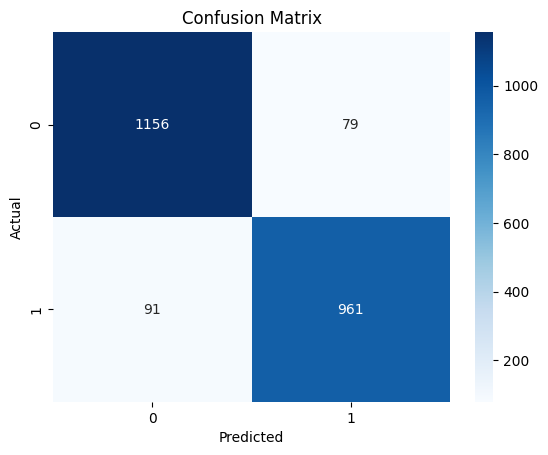

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, ypredict_unigrams_svm)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
rf=ensemble.RandomForestClassifier(n_estimators=1)
rf.fit(xtrain_unigrams,y_train)

RandomForestClassifier(n_estimators=1)

In [69]:
ypredict_unigrams_rf = rf.predict(xtest_unigrams)
accuracy_score_rf = accuracy_score(y_test,ypredict_unigrams_rf)
print('Accuracy score: ', accuracy_score_rf)
print('\nClassification Report:\n', classification_report(y_test,ypredict_unigrams_rf))

Accuracy score:  0.9077393965894185

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1235
           1       0.91      0.88      0.90      1052

    accuracy                           0.91      2287
   macro avg       0.91      0.91      0.91      2287
weighted avg       0.91      0.91      0.91      2287



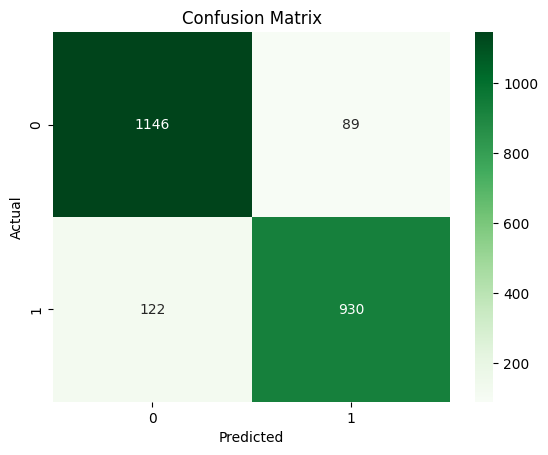

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, ypredict_unigrams_rf)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
mlp=neural_network.MLPClassifier(max_iter=800,activation='tanh',alpha=0.1,learning_rate='adaptive',
                                 hidden_layer_sizes=(50,),solver='adam')
mlp.fit(xtrain_unigrams,y_train)

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=800)

In [72]:
ypredict_unigrams_mlp = mlp.predict(xtest_unigrams)
accuracy_score_mlp = accuracy_score(y_test,ypredict_unigrams_mlp)
print('Accuracy score: ', accuracy_score_mlp)
print('\nClassification Report:\n', classification_report(y_test,ypredict_unigrams_mlp))

Accuracy score:  0.9160472234368168

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1235
           1       0.93      0.89      0.91      1052

    accuracy                           0.92      2287
   macro avg       0.92      0.91      0.92      2287
weighted avg       0.92      0.92      0.92      2287



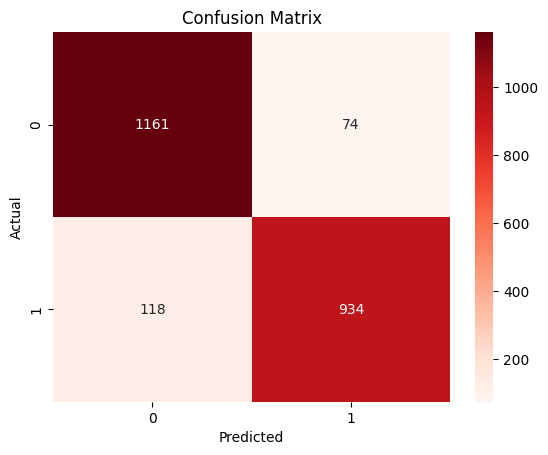

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, ypredict_unigrams_mlp)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
mnb = MultinomialNB()
mnb.fit(xtrain_unigrams,y_train)

MultinomialNB()

In [75]:
ypredict_unigrams_mnb = mnb.predict(xtest_unigrams)
accuracy_score_mnb = accuracy_score(y_test,ypredict_unigrams_mnb)
print('Accuracy score: ', accuracy_score_mnb)
print('\nClassification Report:\n', classification_report(y_test,ypredict_unigrams_mnb))

Accuracy score:  0.9042413642326191

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1235
           1       0.90      0.89      0.90      1052

    accuracy                           0.90      2287
   macro avg       0.90      0.90      0.90      2287
weighted avg       0.90      0.90      0.90      2287



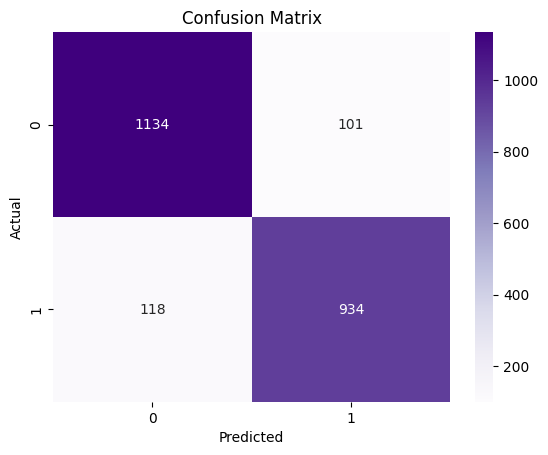

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, ypredict_unigrams_mnb)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import random

Text(0.5, 1.0, 'Accuracy comparision')

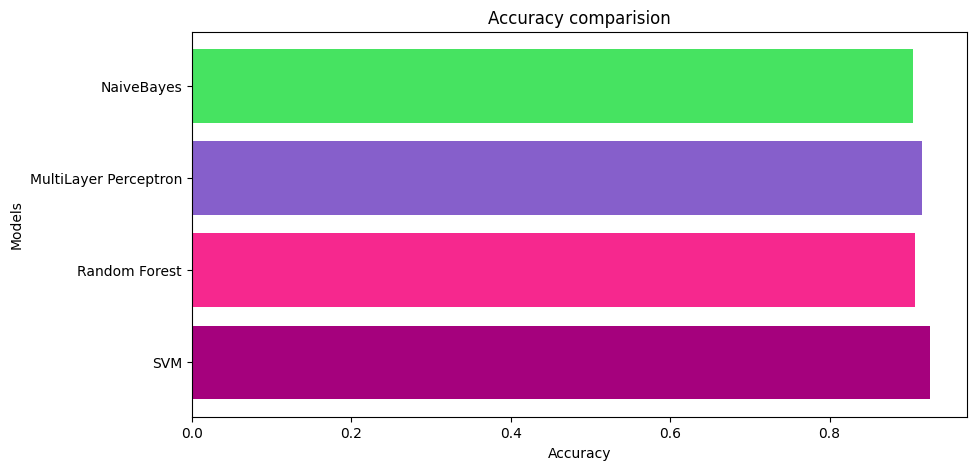

In [88]:
d = {'SVM': accuracy_score_svm, 'Random Forest': accuracy_score_rf, 'MultiLayer Perceptron': accuracy_score_mlp, 'NaiveBayes': accuracy_score_mnb}
models = list(d.keys())
accuracy = list(d.values())
fig= plt.figure(figsize = (10, 5))
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(models))]

plt.barh(models, accuracy, color = colors)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy comparision')